In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import *
import math
import matplotlib.image as mpimg    # mpimg 用于读取图片

In [3]:
#进料温度 : 130-设计号*0.6
#进料量：6600-设计号*60
#进料流体平均浓度：25+设计号*0.6 此为质量百分比
#塔顶产品为浓度98%（质量百分比）的易挥发组分（苯和甲苯体系）
#塔釜排出的残液中要求易挥发组分浓度不大于0.8％(质量百分比)


design_num = 6     #
wen_du = 130-design_num*0.6
jin_liao = 6600-design_num*60
ave_nong = 25+design_num*0.6
out_ = 0.98
plt.rcParams['figure.figsize']=(12.8, 7.2)
plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文乱码
print(wen_du,jin_liao,ave_nong)

126.4 6240 28.6


In [4]:
x_d = 98/78/(98/78+2/92)
x_w = 0.8/78/(99.2/92+0.8/78)
x_f = ave_nong/78/(ave_nong/78+(100-ave_nong)/92)
print(x_d, x_w,x_f)

0.9829917139119058 0.009422367882015567 0.320862396956246


In [5]:
M_f = x_f*78+(1-x_f)*92
F = jin_liao/M_f
print(M_f, F)
# 二元一次方程
D = Symbol('D')
W = Symbol('W')
solved_value=solve([x_d*D+x_w*W-F*x_f, D+W-F], [D, W])
print(solved_value)
D = solved_value[D]
W = solved_value[W]

87.50792644261256 71.30782608695652
{D: 22.8110216496690, W: 48.4968044372875}


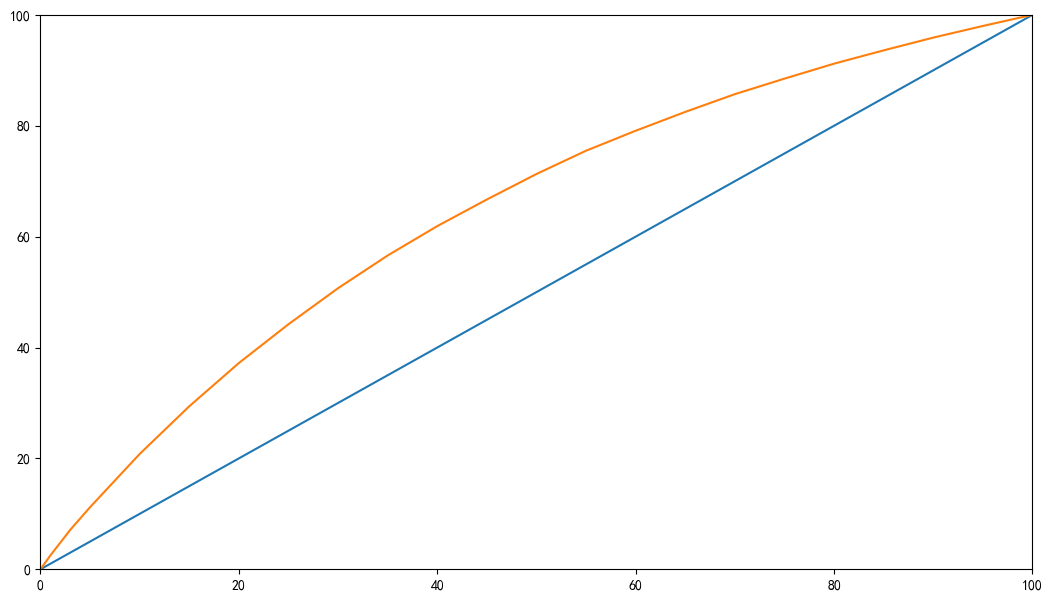

           2
-0.008436 x + 1.801 x + 2.568


In [6]:
#苯-甲苯的气液平衡相图

x_ben = np.array([0, 1,3, 5, 10,15, 20, 25, 30,35, 40, 45,50,55,60,65,70,75,80,85,90,95,97,99,100])
x_jiaben = np.array([0, 2.5,7.11,11.2,20.8,29.4,37.2,44.2,50.7,56.6,61.9,66.7,71.3,75.5,79.1,82.5,85.7,88.5,91.2,93.6,95.9,98.0,98.8,99.61,100])

plt.plot(x_ben,x_ben,x_ben,x_jiaben)
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.show()
z1 = np.polyfit(x_ben, x_jiaben, 2)
p1 = np.poly1d(z1)
print(p1)

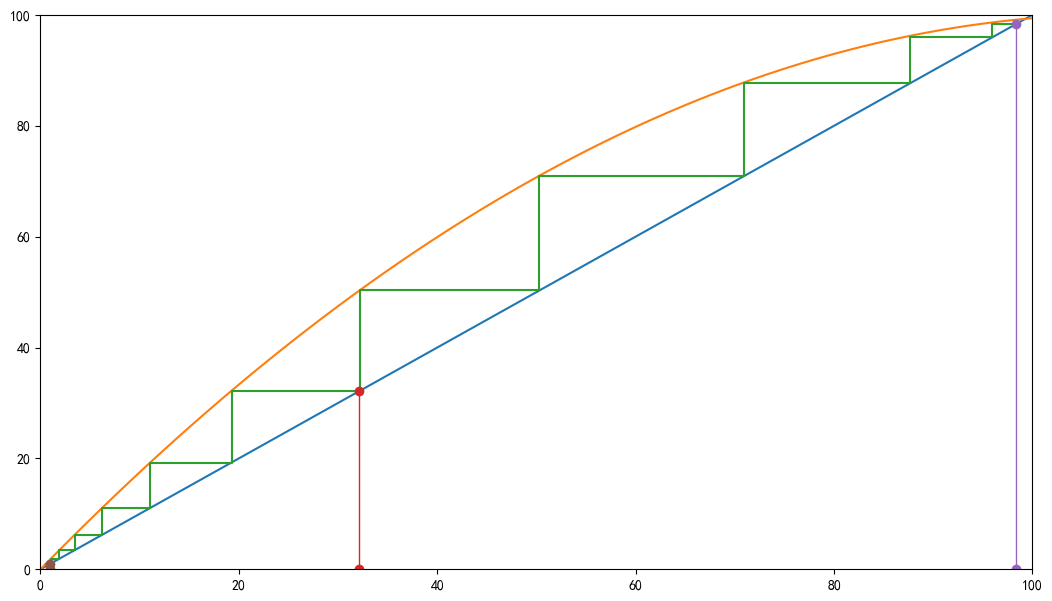

In [7]:
k = [x_d*100,99.94]
x_min = []
y_min = []
x_ben_nihe  = np.linspace(0,100,100)
x_jiaben_nihe = [-0.0084*i*i+1.834*i  for i in x_ben_nihe]
while k[0]/100 >= x_w and k[0] >= 0:
    x = Symbol("x",real="True")
    s = solve(p1[2]*x**2 +1.834*x -k[0])
    i = round(s[0],2)
    if i < 100:
        x_min.append(k[0])
        x_min.append(i)
        y_min.append(k[0])
        y_min.append(k[0])
        k[0] = i
x_1 = [x_f*100, x_f*100]
y_1 = [0,x_f*100]
x_2 = [x_d*100, x_d*100]
y_2 = [0,x_d*100]
x_3 = [x_w*100, x_w*100]
y_3 = [0,x_w*100]
plt.plot(x_ben,x_ben,x_ben_nihe,x_jiaben_nihe,x_min,y_min)
plt.plot(x_1,y_1,x_2,y_2,x_3,y_3,marker='o',linewidth =1)
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

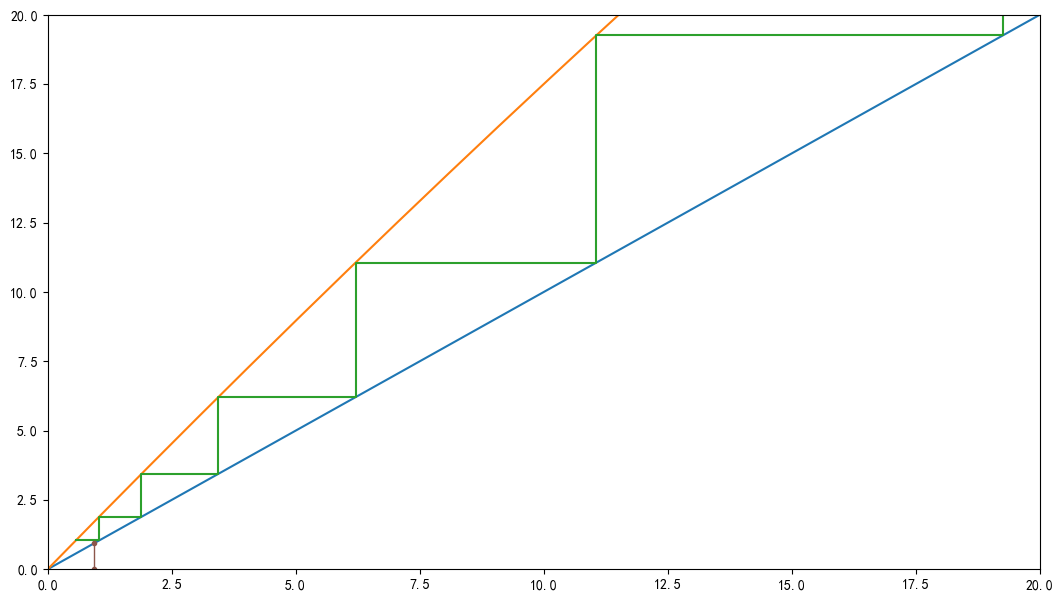

In [8]:
plt.plot(x_ben,x_ben,x_ben_nihe,x_jiaben_nihe,x_min,y_min)
plt.plot(x_1,y_1,x_2,y_2,x_3,y_3,marker='.',linewidth =1)
plt.xlim(0,20)
plt.ylim(0,20)
plt.show()

(-0.5, 439.5, 343.5, -0.5)

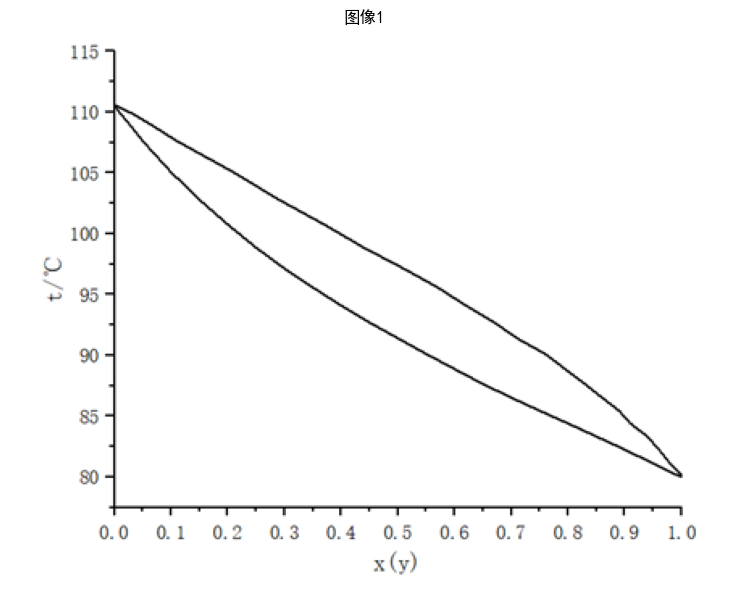

In [10]:
dirpath = "./T-x.png"
img = mpimg.imread(dirpath)
plt.imshow(img)
plt.title('图像1')
#不显示坐标轴
plt.axis('off')

-614.3056436271403 2231.2691819911224
-0.27531668907780593


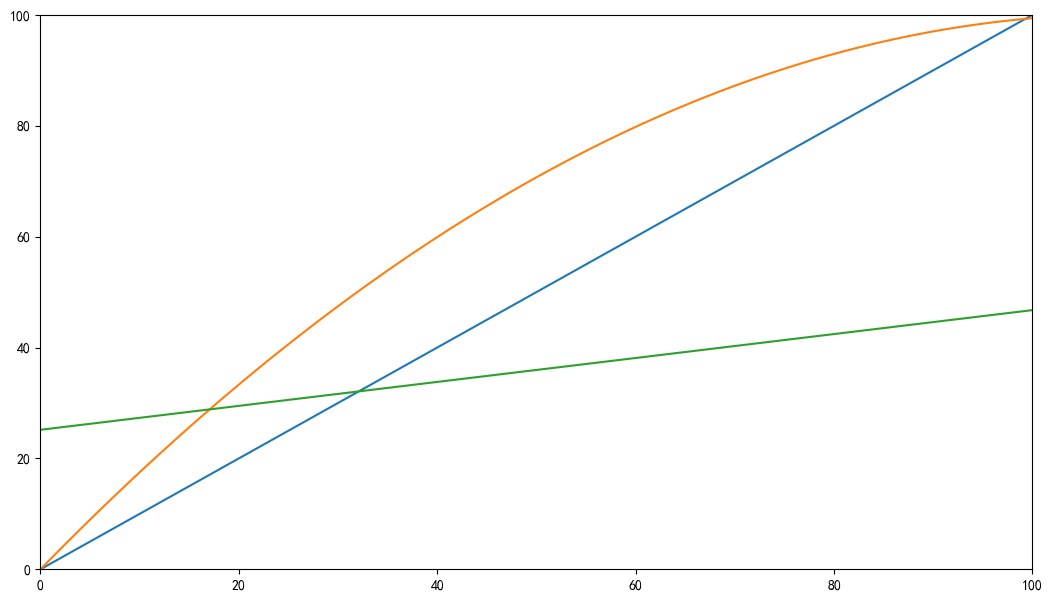

In [11]:
CP_l = 0.45
CP_v = 0.3
ra = 93  #苯的汽化潜热
rb = 87.5
T_1 = 103
T_2 = 96
q_1 = M_f*CP_v*(T_1-wen_du)
q_2 = (ra+CP_v*(T_2-T_1))*78*x_f+(rb+CP_v*(T_2-T_1)*92*(1-x_f))
print(q_1,q_2)
q = q_1/q_2
print(q)
q_a = q/(q-1)
q_b = -1*x_f/(q-1)
q_x = np.linspace(0,100,100)
q_y = [q_a*i+q_b*100  for i in q_x]
plt.plot(x_ben,x_ben,x_ben_nihe,x_jiaben_nihe)
plt.plot(q_x,q_y)
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

In [12]:
q_qx = Symbol('q_qx')
q_qy = Symbol('q_qy')
s = solve([-0.0084*q_qx*q_qx+1.834*q_qx-q_qy,q_a*q_qx+q_b*100-q_qy],[q_qx,q_qy])
print(s[0])
print(s[0][0])
R = (x_d*100-s[0][1])/(s[0][1]-s[0][0])
R_min = R*1.1
if R_min>R:
    R_min = int(R+1)
else :
    R_min = int(R_min)
R_max = int(R*2)
print(R, R_min,R_max)

(17.0593133627622, 28.8422112590710)
17.0593133627622
5.89472647080123 6 11


[6, 7, 8, 9, 10, 11]
136.866129898014 0.8571428571428571 0.14042738770170082 1.70554054322691 -0.00664786255396106


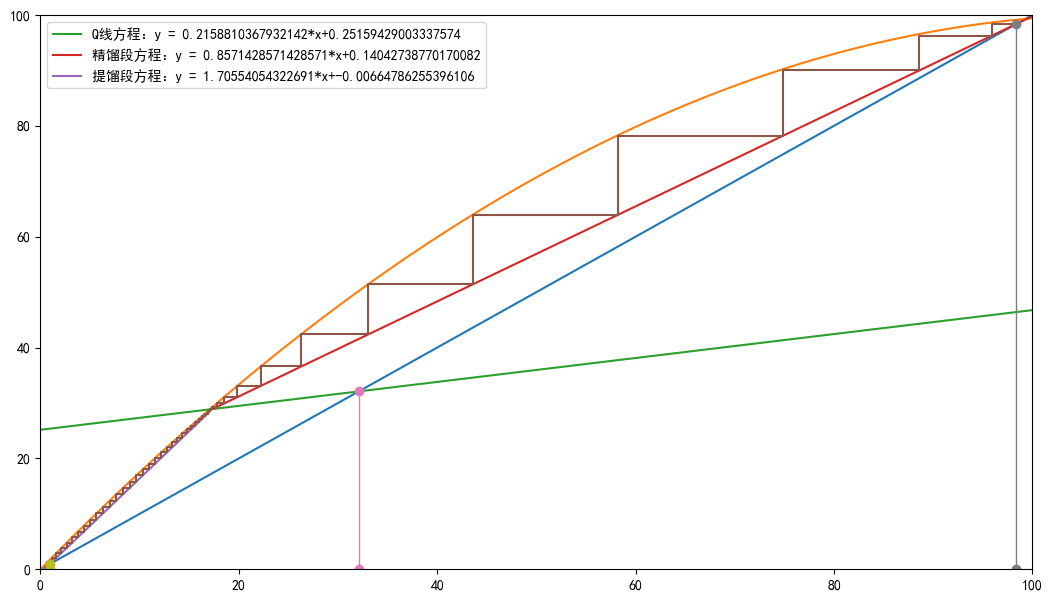

159.677151547683 0.875 0.12287396423898822 1.52974117214149 -0.00499141620616728


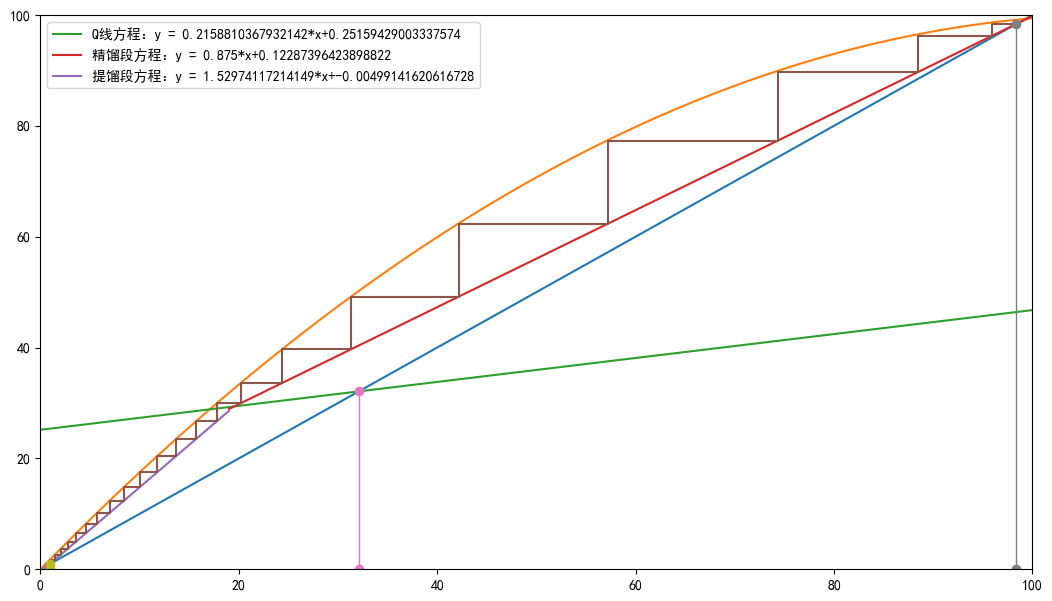

182.488173197352 0.8888888888888888 0.1092213015457673 1.42407460310474 -0.00399578691987263


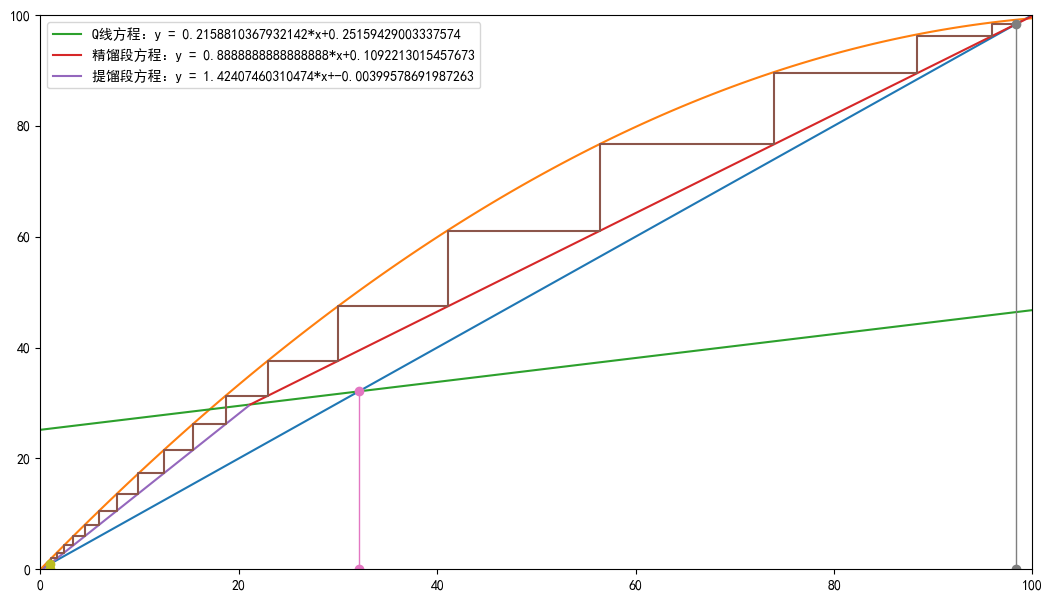

In [ ]:
R_choice = list(range(R_min,R_max+1))  #可以选择的回流比
# R_choice = [6,7,8,9,10,11]
print(R_choice)
for i in range(0,len(R_choice)):
    global D,W
    global q,x_d
    global F,x_w,x_f
    L = R_choice[i]*D
    jing_liu_a = R_choice[i]/(R_choice[i]+1) #精馏段方程的a
    jing_liu_b = 1/(R_choice[i]+1)*x_d
    ti_liu_a = (L+q*F)/(L+q*F-W)
    ti_liu_b = (-1)*(W/(L+q*F-W))*x_w
    #求交点：
    jiaodian_x = Symbol('jiaodian_x')
    jiaodian_y = Symbol('jiaodian_y')
    s_jiaodian = solve([jing_liu_a*jiaodian_x+jing_liu_b*100-jiaodian_y,ti_liu_a*jiaodian_x+ti_liu_b*100-jiaodian_y],[jiaodian_x,jiaodian_y])
    jiaodian_x = s_jiaodian[jiaodian_x]
    jiaodian_y = s_jiaodian[jiaodian_y]
    #画折线图
    x_zhe_x = []
    y_zhe_y = []
    k = [x_d*100]
    while k[0] >= jiaodian_x:
        # break
        i1 = jing_liu_a*k[0]+jing_liu_b*100
        x = Symbol("x",real="True")
        s = solve(p1[2]*x**2 +1.834*x -i1)
        if s[0] < 100:
            x_zhe_x.append(k[0])
            y_zhe_y.append(i1)
            x_zhe_x.append(s[0])
            y_zhe_y.append(i1)
            k[0] = s[0]
    while k[0] >= x_w*100:
        i1 = ti_liu_a*k[0]+ti_liu_b*100
        x = Symbol("x",real="True")
        s = solve(p1[2]*x**2 +1.834*x -i1)
        if s[0] < 100:
            x_zhe_x.append(k[0])
            y_zhe_y.append(i1)
            x_zhe_x.append(s[0])
            y_zhe_y.append(i1)
            k[0] = s[0]
    jing_liu_x = np.linspace(int(jiaodian_x),100,100)
    jing_liu_y = [jing_liu_a*j+jing_liu_b*100  for j in jing_liu_x]
    ti_liu_x = np.linspace(0,int(jiaodian_x),100)
    ti_liu_y = [ti_liu_a*j+ti_liu_b*100  for j in ti_liu_x]
    print(L,jing_liu_a,jing_liu_b,ti_liu_a,ti_liu_b)
    # 作图
    plt.figure(i+1)
    plt.plot(x_ben,x_ben,x_ben_nihe,x_jiaben_nihe)
    plt.plot(q_x,q_y,label=f"Q线方程：y = {q_a}*x+{q_b}")
    plt.plot(jing_liu_x,jing_liu_y,label=f'精馏段方程：y = {jing_liu_a}*x+{jing_liu_b}')
    plt.plot(ti_liu_x,ti_liu_y ,label=f'提馏段方程：y = {ti_liu_a}*x+{ti_liu_b}')
    plt.plot(x_zhe_x,y_zhe_y)
    plt.plot(x_1,y_1,x_2,y_2,x_3,y_3,marker='o',linewidth =1)
    plt.xlim(0,100)
    plt.ylim(0,100)
    plt.legend()
    plt.show()
    

In [ ]:
L_pie = q*F+L
print(L_pie,L)

M_L = x_d*78+(1-x_d)*92
M_L_pie = (1-x_w)*78+x_w*92
m_L = M_L*L
m_L_pie = M_L_pie*L_pie
print(m_L,m_L_pie)
wa = x_d*78/(x_d*78+(1-x_d)*92)
p_ben = 877
p_jiaben = 872
p_L = 1/(wa/p_ben+(1-wa)/p_jiaben)
wa_pie = x_w*78/(x_w*78+(1-x_w)*92)
p_L_pie = 1/(x_w/p_ben+(1-x_w)/p_jiaben)
print(wa,wa_pie,p_L,p_L_pie,V)
V_l = m_L/p_L
V_lpie = m_L_pie/p_L_pie
V = (V_l+V_lpie)*0.3
# print(V_lpie,V_l,p_L,x_d)

In [ ]:
eta = 0.7
for i in range(0,len(R_choice)):
    Q_c = (R_choice[i]+1)*D*78*393.9
    q_mc = Q_c/eta/(4.187*10)
    v_jia = (R_choice[i]+1)*D
    Q_b = v_jia*363*92/eta
    w_h = Q_b/2187
    print(q_mc, w_h)

In [ ]:
ben_p = 877   #kg/m3
jiaben_p = 872  #kg/m3
v_top = V_l
v_bottom = V_lpie
p_top_pingjun  = 0.98*ben_p+0.02*jiaben_p
p_bottom_pingjun = 0.992*ben_p+0.008*jiaben_p
m_top_ben = p_top_pingjun*v_top
m_bottom_jiaben = p_bottom_pingjun*v_bottom
print(m_top_ben,  m_bottom_jiaben)